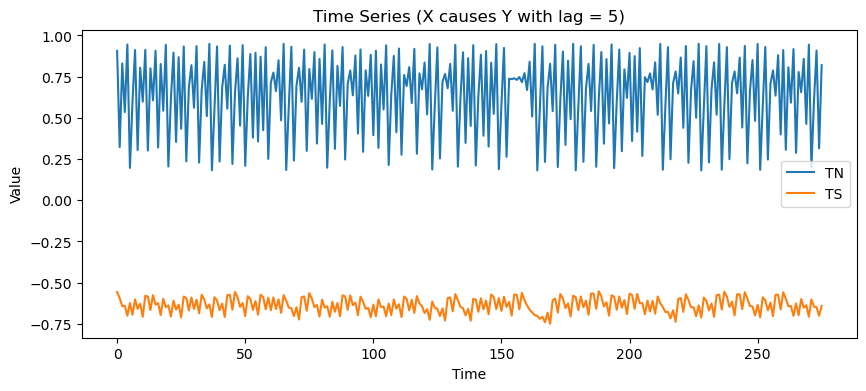

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEDM import CCM
import plotly.graph_objects as go

# PARAMETERS for the new system
r_x = 3.8            
LAG = 5          
t_total = 300    # number of time steps

# Initial conditions
TN0 = 0.4
TS0 = 0.2

# Generate time series
TN = [TN0]
TS = [TS0]

BPS_tau=4
dt=1


for t in range(t_total):
    # Evolve X with a logistic map
    TN_new = r_x * TN[-1] * (1 - TN[-1])
    TN.append(TN_new)
    
    if t < LAG:
        TS_new= TS[-1]
    else:
        TS_new= TS[-1] + dt * (1 / BPS_tau) * (-TN[t-LAG] - TS[-1])
    TS.append(TS_new)

# CROP THE FIRST 25 VALUES
TN = TN[25:]
TS = TS[25:]
time = list(range(t_total - 25 + 1))    
    


# Plot the time series for X and Y
plt.figure(figsize=(10, 4))
plt.plot(time, TN, label="TN", color='tab:blue')
plt.plot(time, TS, label="TS", color='tab:orange')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Time Series (X causes Y with lag = {LAG})")
plt.legend()
plt.show()

In [15]:
import pandas as pd
from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)

df_TN = pd.DataFrame({
    'age': time,
    'TN': TN,  
})

df_TS = pd.DataFrame({
    'age': time,
    'TS': TS,    
})


cf.find_optimal_E_tau(df_TS, df_TN, maxE=8, maxTau=10)


[INFO] Using lib=1 266, pred=1 266


[INFO] Best E=8, tau=1 with rho=0.992


(8,
 1,
 array([[-0.01115837, -0.01115837, -0.01115837, -0.01115837, -0.01115837,
         -0.01115837, -0.01115837, -0.01115837, -0.01115837, -0.01115837],
        [ 0.75797524,  0.78561318,  0.55422308,  0.57050771,  0.80151467,
          0.79341059,  0.10610509,  0.38106247,  0.10324596,  0.04123078],
        [ 0.85440974,  0.90135751,  0.92765919,  0.70084691,  0.76887912,
          0.80705617,  0.14781942,  0.28079239,  0.12549073,  0.14117677],
        [ 0.89457961,  0.96001979,  0.90631415,  0.60447578,  0.73350295,
          0.77122848,  0.11791946,  0.30038321,  0.11653156,  0.11021041],
        [ 0.9532175 ,  0.95843975,  0.85557034,  0.43367339,  0.71049912,
          0.77816623,  0.01324475,  0.18455823,  0.15925195,  0.15911369],
        [ 0.96740349,  0.94970363,  0.81809971,  0.42583296,  0.67655999,
          0.77497695, -0.03462943,  0.08327404,  0.12591696,  0.13657997],
        [ 0.9901118 ,  0.93201309,  0.79943497,  0.40542738,  0.65997394,
          0.74702055,  0

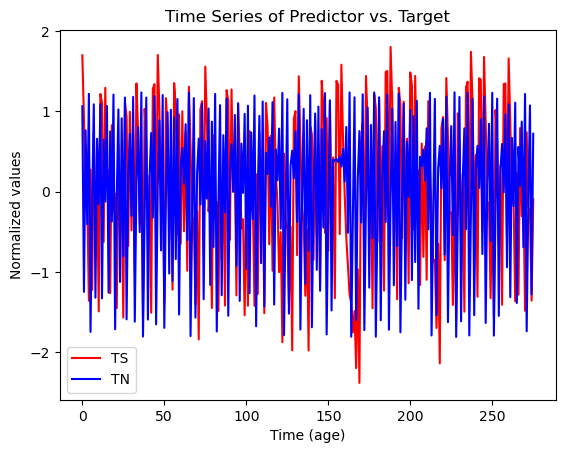

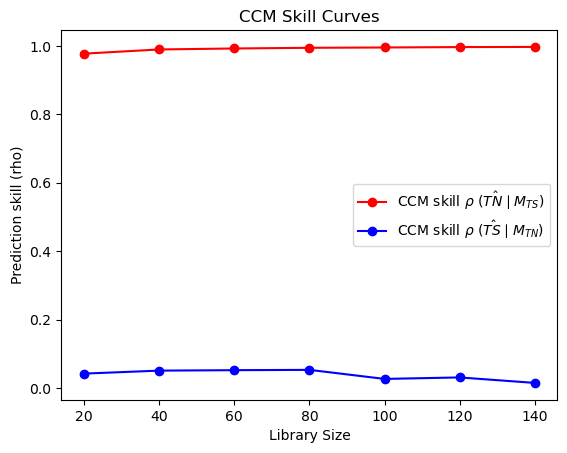

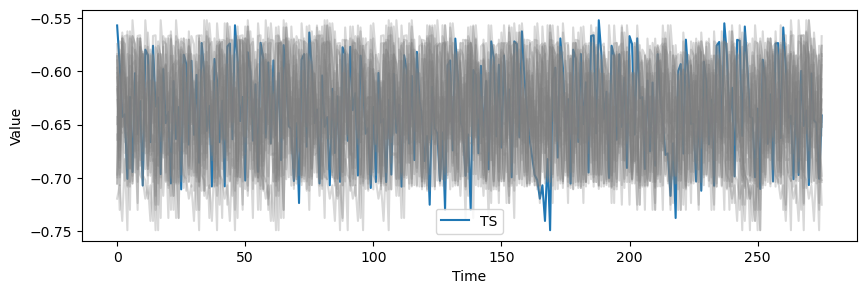

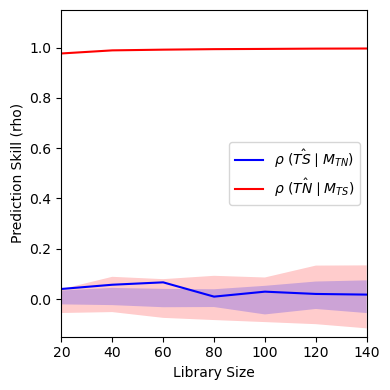

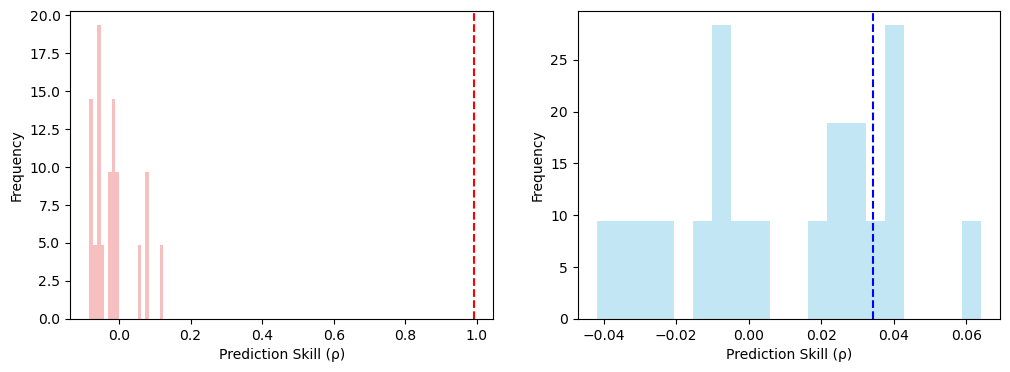

(True, False)


In [26]:

import pandas as pd
import numpy as np
from pyEDM import CCM
import matplotlib.pyplot as plt



# Prepare DataFrame
df_TN = pd.DataFrame({
    'age': time,
    'TN': TN,  
})

df_TS = pd.DataFrame({
    'age': time,
    'TS': TS,    
})


from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)


result = cf.ccm_DOXmapForcing(
    df_sd      = df_TS,
    df_pre     = df_TN,
    E          = 2,
    tau        = 1,
    libSizes   = "20 40 60 80 100 120 140",
    Tp=-5,
    sample     = 20,
    showPlot   = True
)

from toolbox import significant_test as st
import importlib
importlib.reload(st)

ccm_out, ran_ccm_list,test_result = st.ccm_significance_test(
    df_sd      = df_TS,
    df_pre     = df_TN,
    E         = 2,
    tau       = 1,
    Tp =-5,
    n_ran     = 20,
    libSizes  = "20 40 60 80 100 120 140",
    sample    = 20,
    showPlot  = True
)


print(test_result)

In [27]:

# Build a dataframe for pyEDM
df = pd.DataFrame({
    "Time": time,
    "TN": TN,
    "TS": TS,
})


Tps = range(-10, 11)  # scanning Tp from -10 to 10
forward_max_rhos = []  # for X -> Y
reverse_max_rhos = []  # for Y -> X

# For each Tp, run CCM
for Tp in Tps:
    ccm_out = CCM(
        dataFrame   = df,
        E           = 2,
        tau         = 1,
        columns     = 'TS',    # use X as the library (predictor)
        target      = 'TN',    # predict Y (target)
        libSizes    = '200',
        sample      = 200,
        random      = True,
        replacement = False,
        Tp          = Tp
    )

    forward_rho = ccm_out['TS:TN'].max()  # X->Y (i.e. predicting Y from X)
    reverse_rho = ccm_out['TN:TS'].max()  # Y->X (predicting X from Y)
    forward_max_rhos.append(forward_rho)
    reverse_max_rhos.append(reverse_rho)

# Plot the CCM skill vs. Tp using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(Tps), 
    y=forward_max_rhos, 
    mode='lines+markers', 
    name="CCM skill ρ (TS xmap TN)",
    line=dict(color='red')  # specify your color here
))

fig.add_trace(go.Scatter(
    x=list(Tps), 
    y=reverse_max_rhos, 
    mode='lines+markers', 
    name="CCM skill ρ (TN xmap TS)",
    line=dict(color='blue')  # specify your color here
))

fig.update_layout(
    title="Max CCM Skill vs. Tp",
    xaxis_title="Tp",
    yaxis_title="Max CCM Skill (rho)",
    width=900,
    height=400
)
fig.update_xaxes(tickmode='array', tickvals=list(Tps))
fig.show()


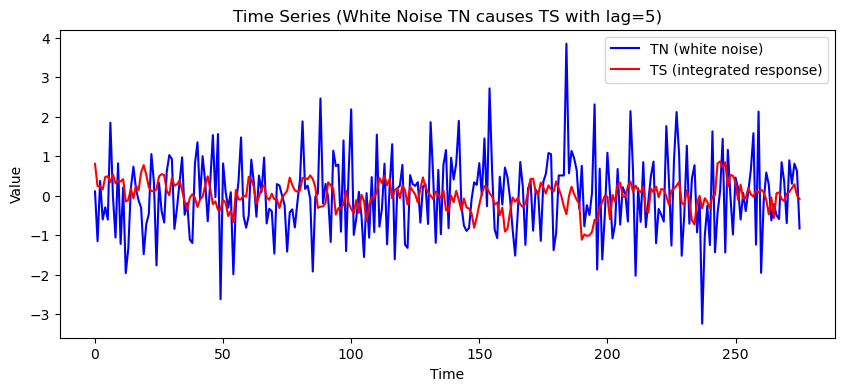

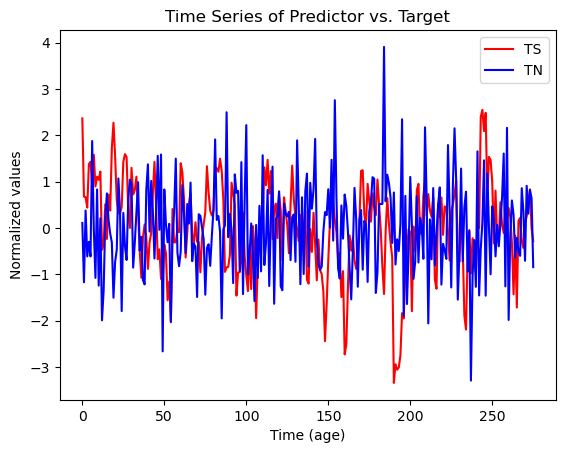

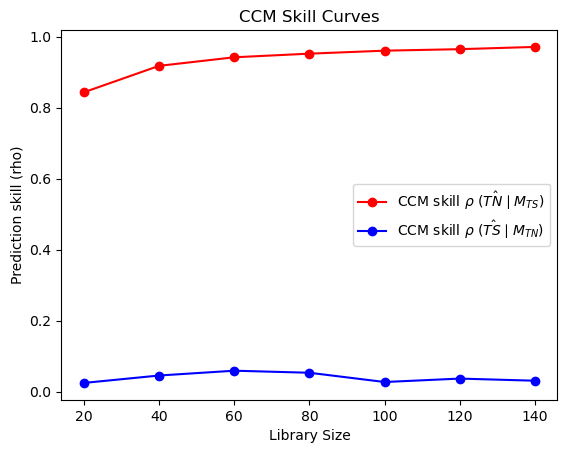

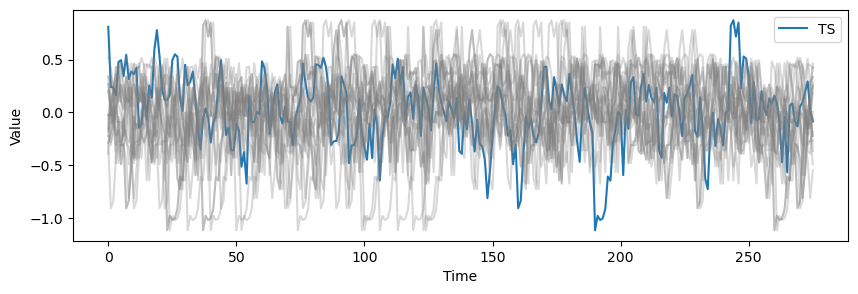

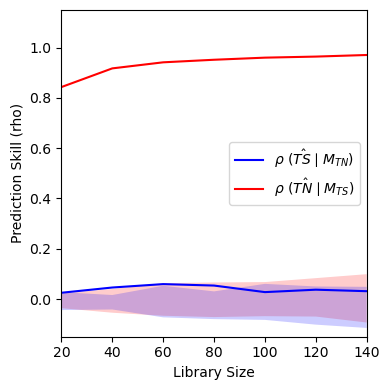

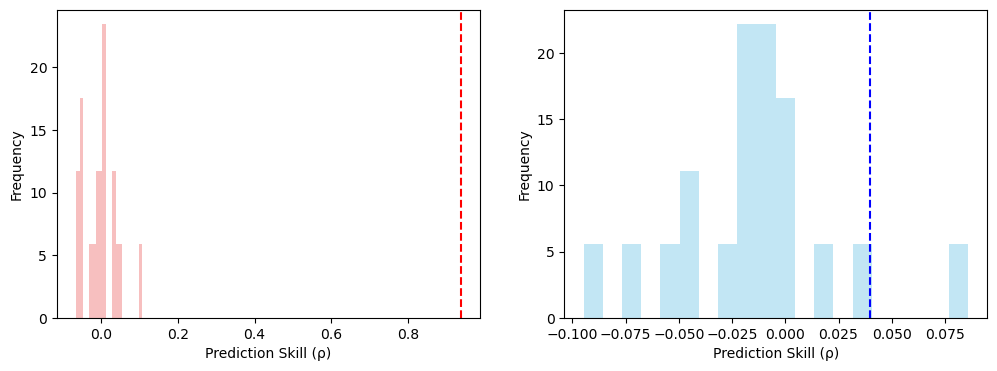

(True, True)


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEDM import CCM
import plotly.graph_objects as go

# PARAMETERS
LAG = 5          
t_total = 300
BPS_tau = 4
dt = 1

# Initial conditions
TS0 = 0.2

# Generate white noise series for TN
np.random.seed(42)  # for reproducibility
TN = np.random.normal(loc=0, scale=1, size=t_total+1)

# Generate time series for TS (response to TN)
TS = [TS0]
for t in range(t_total):
    if t < LAG:
        TS_new = TS[-1]
    else:
        TS_new = TS[-1] + dt * (1 / BPS_tau) * (-TN[t - LAG] - TS[-1])
    TS.append(TS_new)

# Crop the first 25 values
TN = TN[25:]
TS = TS[25:]
time = list(range(t_total - 25 + 1))

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time, TN, label="TN (white noise)", color='b')
plt.plot(time, TS, label="TS (integrated response)", color='r')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Time Series (White Noise TN causes TS with lag={LAG})")
plt.legend()
plt.show()



import pandas as pd
import numpy as np
from pyEDM import CCM
import matplotlib.pyplot as plt



# Prepare DataFrame
df_TN = pd.DataFrame({
    'age': time,
    'TN': TN,  
})

df_TS = pd.DataFrame({
    'age': time,
    'TS': TS,    
})


from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)


result = cf.ccm_DOXmapForcing(
    df_sd      = df_TS,
    df_pre     = df_TN,
    E          = 2,
    tau        = 1,
    libSizes   = "20 40 60 80 100 120 140",
    Tp=-5,
    sample     = 20,
    showPlot   = True
)

from toolbox import significant_test as st
import importlib
importlib.reload(st)

ccm_out, ran_ccm_list,test_result = st.ccm_significance_test(
    df_sd      = df_TS,
    df_pre     = df_TN,
    E         = 2,
    tau       = 1,
    Tp =-5,
    n_ran     = 20,
    libSizes  = "20 40 60 80 100 120 140",
    sample    = 20,
    showPlot  = True
)


print(test_result)

# Dataframe for pyEDM
df = pd.DataFrame({
    "Time": time,
    "TN": TN,
    "TS": TS,
})

# CCM Analysis
Tps = range(-10, 11)
forward_max_rhos = []
reverse_max_rhos = []

for Tp in Tps:
    ccm_out = CCM(
        dataFrame=df,
        E=2,
        tau=1,
        columns='TS',
        target='TN',
        libSizes='200',
        sample=200,
        random=True,
        replacement=False,
        Tp=Tp
    )

    forward_rho = ccm_out['TS:TN'].max()
    reverse_rho = ccm_out['TN:TS'].max()
    forward_max_rhos.append(forward_rho)
    reverse_max_rhos.append(reverse_rho)

# Plot CCM skill vs Tp
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=list(Tps), 
    y=forward_max_rhos, 
    mode='lines+markers', 
    name="CCM skill ρ (TS xmap TN)",
    line=dict(color='red')  # specify your color here
))

fig.add_trace(go.Scatter(
    x=list(Tps), 
    y=reverse_max_rhos, 
    mode='lines+markers', 
    name="CCM skill ρ (TN xmap TS)",
    line=dict(color='blue')  # specify your color here
))


fig.update_layout(
    title="Max CCM Skill vs. Tp (White Noise TN)",
    xaxis_title="Tp",
    yaxis_title="Max CCM Skill (rho)",
    width=900,
    height=400
)
fig.update_xaxes(tickmode='array', tickvals=list(Tps))
fig.show()